# Not Fully Connected

## Imports


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, concatenate
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import random
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping

## Data

In [2]:
def gen_data(num_examples, range_start, range_end):
    X = []
    y = []
    for ex in range(num_examples):
        num1 = int(random.random()*(range_end - range_start) + range_start)
        num2 = int(random.random()*(range_end - range_start) + range_start)

        X.append([num1,num2])        
        y.append(num1+num2)
    return np.array(X), np.array(y)

In [3]:
x_train, y_train = gen_data(10, -50, 50)
x_test, y_test = gen_data(10, 50, 200)

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
[a.shape for a in [x_train, y_train, x_test, y_test]]

[(10, 1, 2), (10,), (10, 1, 2), (10,)]

## Sample Model
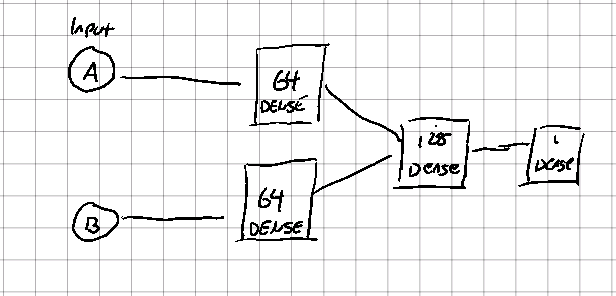

## Building The Model


### Input Layer

In [4]:
# Input layer of 2 neurons 
inp = Input(shape=(1,2))

# get individual neurons from input layer

inp_1 = Lambda(lambda x: x[:,:,0:1])(inp)  # first neuron (A)
inp_2 = Lambda(lambda x: x[:,:,1:2])(inp) # second neuron (B)

### Hidden Layers

In [5]:
# Dense Layer for inp_1 (A)
d_1 = Dense(64)(inp_1) #inp_1 is connected to this layer
d_2 = Dense(64)(inp_2) #inp_2 is connected to this layer

#concatenate output from d_1 and d_2
d_out = concatenate([d_1, d_2])

#128 layer
d2_out = Dense(128)(d_out)

### Output Layer

In [6]:
o = Dense(1)(d2_out)

### Keras Model

In [7]:
model = Model(inp, o)

model.compile(
    loss="MeanSquaredError",
    metrics=['accuracy']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 2)]       0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1, 1)         0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1, 1)         0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 64)        128         lambda[0][0]                     
______________________________________________________________________________________________

## Train Model

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min')

history = model.fit(
    x_train, y_train,
    batch_size=10000,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks = [es]
)

Epoch 1/100
1/1 [==============================] - 0s 343ms/step - loss: 2307.6987 - accuracy: 0.0000e+00 - val_loss: 19747.1230 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 698.3929 - accuracy: 0.0000e+00 - val_loss: 6124.0771 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 245.3420 - accuracy: 0.0000e+00 - val_loss: 1806.1016 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 86.0212 - accuracy: 0.0000e+00 - val_loss: 507.0460 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 29.2110 - accuracy: 0.0000e+00 - val_loss: 138.4673 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 9.3602 - accuracy: 0.0000e+00 - val_loss: 37.4665 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 51ms/step - loss: 2.7769 - accura

## Test Model

In [9]:
pred = model.predict(x_test)

In [10]:
for a in range(len(x_test)):
    x = x_test[a]
    y = y_test[a]
    yp = pred[a][0]
    print(f"input={x[0]} expected_output={[y]} prediction={yp} difference={yp - y} %-different from actual={abs(yp - y)/y}")

input=[108 106] expected_output=[214] prediction=[213.85828] difference=[-0.14172363] %-different from actual=[0.00066226]
input=[ 77 168] expected_output=[245] prediction=[244.85146] difference=[-0.14854431] %-different from actual=[0.0006063]
input=[ 73 119] expected_output=[192] prediction=[191.86783] difference=[-0.13217163] %-different from actual=[0.00068839]
input=[133 136] expected_output=[269] prediction=[268.83954] difference=[-0.16046143] %-different from actual=[0.00059651]
input=[154 168] expected_output=[322] prediction=[321.82178] difference=[-0.17822266] %-different from actual=[0.00055349]
input=[ 77 131] expected_output=[208] prediction=[207.86266] difference=[-0.13734436] %-different from actual=[0.00066031]
input=[127 171] expected_output=[298] prediction=[297.83127] difference=[-0.16873169] %-different from actual=[0.00056621]
input=[194  91] expected_output=[285] prediction=[284.82965] difference=[-0.17034912] %-different from actual=[0.00059772]
input=[87 60] exp